In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.probability import FreqDist  
from nltk.tokenize import word_tokenize
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\GARVITA\Downloads\Aug Batch Project Details\Aug Batch Project Details\fake_job_postings.csv')

# Fill NaN values in employment_type, industry, and function columns
df['employment_type'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)
df['department'].fillna('Not Specified', inplace=True)

# Fill NaN values in required_education column
df['required_education'].fillna("Bachelor's Degree", inplace=True)

# Create dummies for categorical columns
categorical_columns = ['title', 'location', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function', 'department']

for col in categorical_columns:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df.drop(col, axis=1, inplace=True)

# Filter out non-numeric values from the 'salary_range' column
df['salary_range'] = df['salary_range'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)

# Handle department and salary_range columns
# Fill NaN values with median values
median_salary = df['salary_range'].median()
df['salary_range'].fillna(median_salary, inplace=True)

# Check for remaining null values
print(df.isnull().sum())

df.drop(['department_ΕΜΠΟΡΙΚΟ', 'department_ΠΛΗΡΟΦΟΡΙΚΗ'], axis=1, inplace=True)

df.dropna(subset=['description'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

stop_words = set(stopwords.words('english'))
text_columns = ['description', 'company_profile', 'requirements', 'benefits']

word_frequencies = []

for col in text_columns:
    freq_dist = FreqDist()

    for text in df[col]:
        # Check if the text is a string or handle non-string values
        if isinstance(text, str):
            
            words = word_tokenize(text)
            words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
            freq_dist.update(words)

    word_frequencies.append(freq_dist)

# Print the top 10 most common words for each text column
for i, col in enumerate(text_columns):
    print(f"Top 10 words in {col}:")
    common_words = word_frequencies[i].most_common(10)
    for word, frequency in common_words:
        print(f"{word}: {frequency}")
    print("\n")

# Combine the list of word frequencies into a DataFrame
word_frequencies_df = pd.DataFrame(word_frequencies)

# Drop original text columns
df.drop(text_columns, axis=1, inplace=True)
print(df.columns)


job_id                           0
salary_range                     0
company_profile               3308
description                      1
requirements                  2696
                              ... 
department_warehouse             0
department_web development       0
department_Área Comercial        0
department_ΕΜΠΟΡΙΚΟ              0
department_ΠΛΗΡΟΦΟΡΙΚΗ           0
Length: 15880, dtype: int64
Top 10 words in description:
team: 17639
work: 14371
business: 10474
new: 9709
experience: 9648
company: 9644
customer: 9570
sales: 9043
looking: 8720
development: 7939


Top 10 words in company_profile:
team: 7170
work: 6920
company: 6790
services: 6619
people: 6363
solutions: 5480
business: 5392
us: 5185
new: 4613
clients: 4436


Top 10 words in requirements:
experience: 21446
skills: 10427
work: 9742
years: 7855
ability: 7256
knowledge: 6220
communication: 5438
required: 4949
working: 4785
degree: 4774


Top 10 words in benefits:
work: 4095
benefits: 3717
company: 3244
competit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.probability import FreqDist  # Add this import
from nltk.tokenize import word_tokenize
import seaborn as sns


# Load the dataset
df = pd.read_csv(r'C:\Users\GARVITA\Downloads\Aug Batch Project Details\Aug Batch Project Details\fake_job_postings.csv')

# Fill NaN values in employment_type, industry, and function columns
df['employment_type'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)
df['department'].fillna('Not Specified', inplace=True)

# Fill NaN values in required_education column
df['required_education'].fillna("Bachelor's Degree", inplace=True)

# Create dummies for categorical columns
categorical_columns = ['title', 'location', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function', 'department']

for col in categorical_columns:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df.drop(col, axis=1, inplace=True)

# Filter out non-numeric values from the 'salary_range' column
df['salary_range'] = df['salary_range'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)

# Handle department and salary_range columns
# Fill NaN values with median values
median_salary = df['salary_range'].median()
df['salary_range'].fillna(median_salary, inplace=True)

# Check for remaining null values
print(df.isnull().sum())

df.drop(['department_ΕΜΠΟΡΙΚΟ', 'department_ΠΛΗΡΟΦΟΡΙΚΗ'], axis=1, inplace=True)

df.dropna(subset=['description'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

stop_words = set(stopwords.words('english'))
text_columns = ['description', 'company_profile', 'requirements', 'benefits']

word_frequencies = []

for col in text_columns:
    freq_dist = FreqDist()

    for text in df[col]:
        # Check if the text is a string or handle non-string values
        if isinstance(text, str):
            
            words = word_tokenize(text)
            words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
            freq_dist.update(words)

    word_frequencies.append(freq_dist)

# Print the top 10 most common words for each text column
for i, col in enumerate(text_columns):
    print(f"Top 10 words in {col}:")
    common_words = word_frequencies[i].most_common(10)
    for word, frequency in common_words:
        print(f"{word}: {frequency}")
    print("\n")

# Combine the list of word frequencies into a DataFrame
word_frequencies_df = pd.DataFrame(word_frequencies)

# Drop original text columns
df.drop(text_columns, axis=1, inplace=True)
print(df.columns)

# Group data by 'department' and calculate the total number of fake jobs
fake_jobs_by_department = df[df['fraudulent'] == 1].groupby('department')['job_id'].count()
# Find the department with the most fake jobs
department_with_most_fake_jobs = fake_jobs_by_department.idxmax()
# Print the result
print(f"The department with the most fake jobs is: {department_with_most_fake_jobs}")

# Filter the dataset to include only jobs located in the US (assuming the location column contains country information)
us_jobs = df[df['location'].str.contains('US', case=False, na=False, regex=False)]
# Group data by 'title' and calculate the frequency of each title
common_job_titles = us_jobs['title'].value_counts()
# Get the top 5 most common job titles
top_common_job_titles = common_job_titles.head(5)
# Print the result
print("The top 5 most common job titles in the US are:")
print(top_common_job_titles)


In [ ]:
X = df.drop('fraudulent', axis=1)  # Features
y = df['fraudulent']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    roc_auc = roc_auc_score(true_labels, predictions)
    return accuracy, precision, recall, f1, roc_auc

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model 2: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Model 3: AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

# Model 4: Bagging
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

# Evaluate each model
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(rf_predictions, y_test)
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc = evaluate_model(gb_predictions, y_test)
ada_accuracy, ada_precision, ada_recall, ada_f1, ada_roc_auc = evaluate_model(ada_predictions, y_test)
bagging_accuracy, bagging_precision, bagging_recall, bagging_f1, bagging_roc_auc = evaluate_model(bagging_predictions, y_test)


In [4]:
print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

print("\nGradient Boosting Model:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)
print("ROC AUC Score:", gb_roc_auc)

print("\nAdaBoost Model:")
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1 Score:", ada_f1)
print("ROC AUC Score:", ada_roc_auc)

print("\nBagging Model:")
print("Accuracy:", bagging_accuracy)
print("Precision:", bagging_precision)
print("Recall:", bagging_recall)
print("F1 Score:", bagging_f1)
print("ROC AUC Score:", bagging_roc_auc)


Random Forest Model:
Accuracy: 0.9862975391498882
Precision: 1.0
Recall: 0.7307692307692307
F1 Score: 0.8444444444444443
ROC AUC Score: 0.8653846153846154

Gradient Boosting Model:
Accuracy: 0.9809843400447428
Precision: 0.9830508474576272
Recall: 0.6373626373626373
F1 Score: 0.7733333333333333
ROC AUC Score: 0.8183866810855615

AdaBoost Model:
Accuracy: 0.9779082774049217
Precision: 0.8872180451127819
Recall: 0.6483516483516484
F1 Score: 0.7492063492063492
ROC AUC Score: 0.821966042207645

Bagging Model:
Accuracy: 0.9491051454138703
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


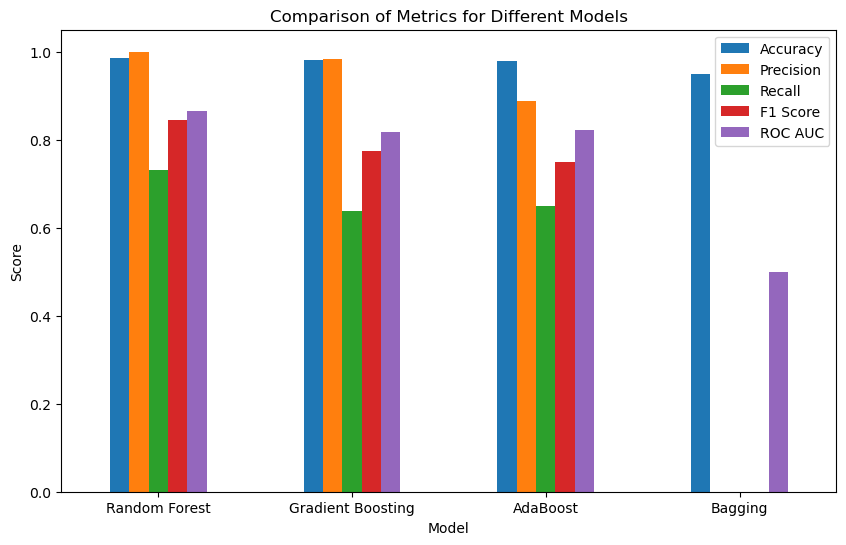

In [5]:
# Create a dictionary of metrics
metrics = {
    'Accuracy': [rf_accuracy, gb_accuracy, ada_accuracy, bagging_accuracy],
    'Precision': [rf_precision, gb_precision, ada_precision, bagging_precision],
    'Recall': [rf_recall, gb_recall, ada_recall, bagging_recall],
    'F1 Score': [rf_f1, gb_f1, ada_f1, bagging_f1],
    'ROC AUC': [rf_roc_auc, gb_roc_auc, ada_roc_auc, bagging_roc_auc]
}

metrics_df = pd.DataFrame(metrics, index=['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging'])

# Comparing Metrics: Bar Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


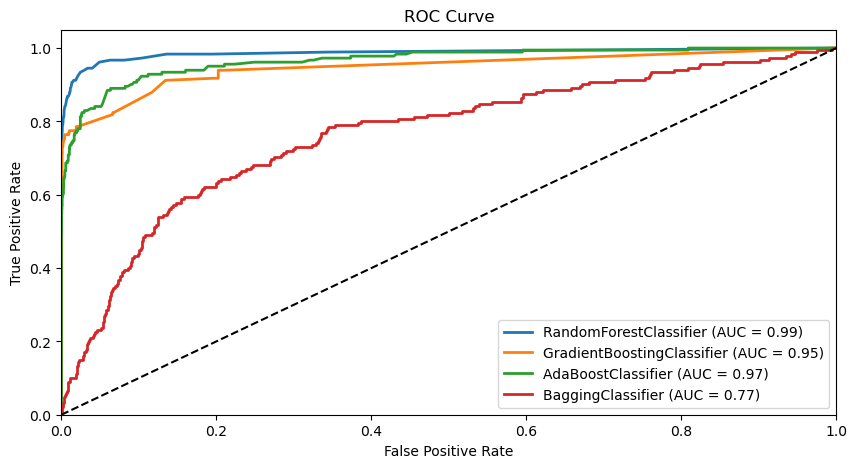

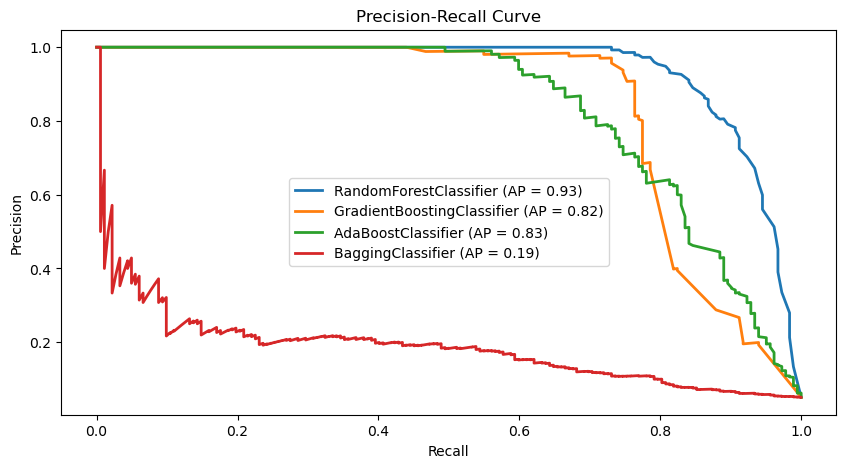

In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# ROC Curve
plt.figure(figsize=(10, 5))
for idx, model in enumerate([rf_model, gb_model, ada_model, bagging_model]):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 5))
for idx, model in enumerate([rf_model, gb_model, ada_model, bagging_model]):
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, lw=2, label=f'{model.__class__.__name__} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()